In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [4]:
categorical_features=['age','anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']

In [5]:
from ctgan import CTGAN

In [6]:
ctgan= CTGAN(verbose=True)
ctgan.fit(data,categorical_features,epochs=20000)

Gen. (-0.74) | Discrim. (-0.20): 100%|██████████| 20000/20000 [27:25<00:00, 12.16it/s]


In [7]:
samples= ctgan.sample(100000)

In [8]:
samples

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,64.0,0,358,0,22,0,197960.590149,2.107432,128,1,0,1
1,70.0,0,459,1,52,0,301781.197871,1.255436,137,0,0,0
2,59.0,1,596,0,22,1,261543.073931,2.437256,131,1,1,1
3,59.0,1,89,1,25,1,334518.408730,1.968526,134,1,1,1
4,70.0,0,-41,1,68,0,378415.345725,1.181185,139,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,75.0,1,-4,1,21,0,142497.759763,1.236782,133,1,0,1
99996,68.0,1,1934,1,37,0,190735.125779,1.304271,140,1,0,0
99997,72.0,0,101,0,28,0,198593.164754,0.908946,138,0,0,1
99998,42.0,1,157,0,33,0,222938.305546,1.193819,134,1,0,0


In [9]:
from table_evaluator import TableEvaluator

(299, 12) (100000, 12)


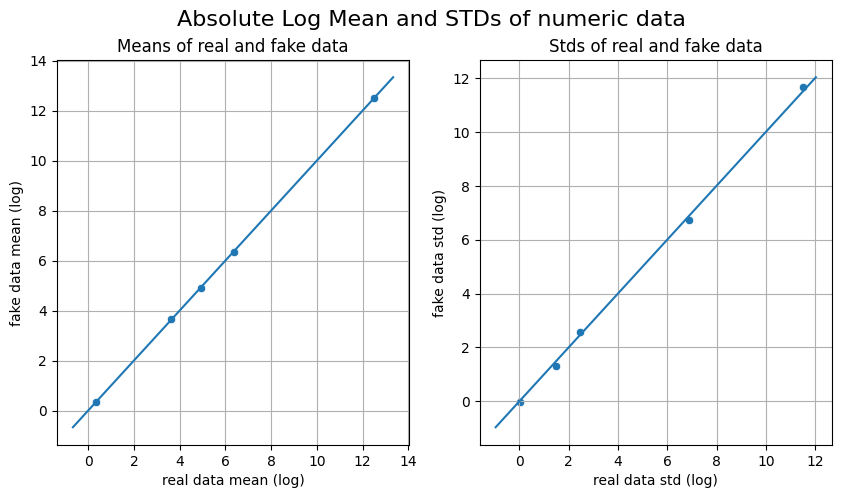

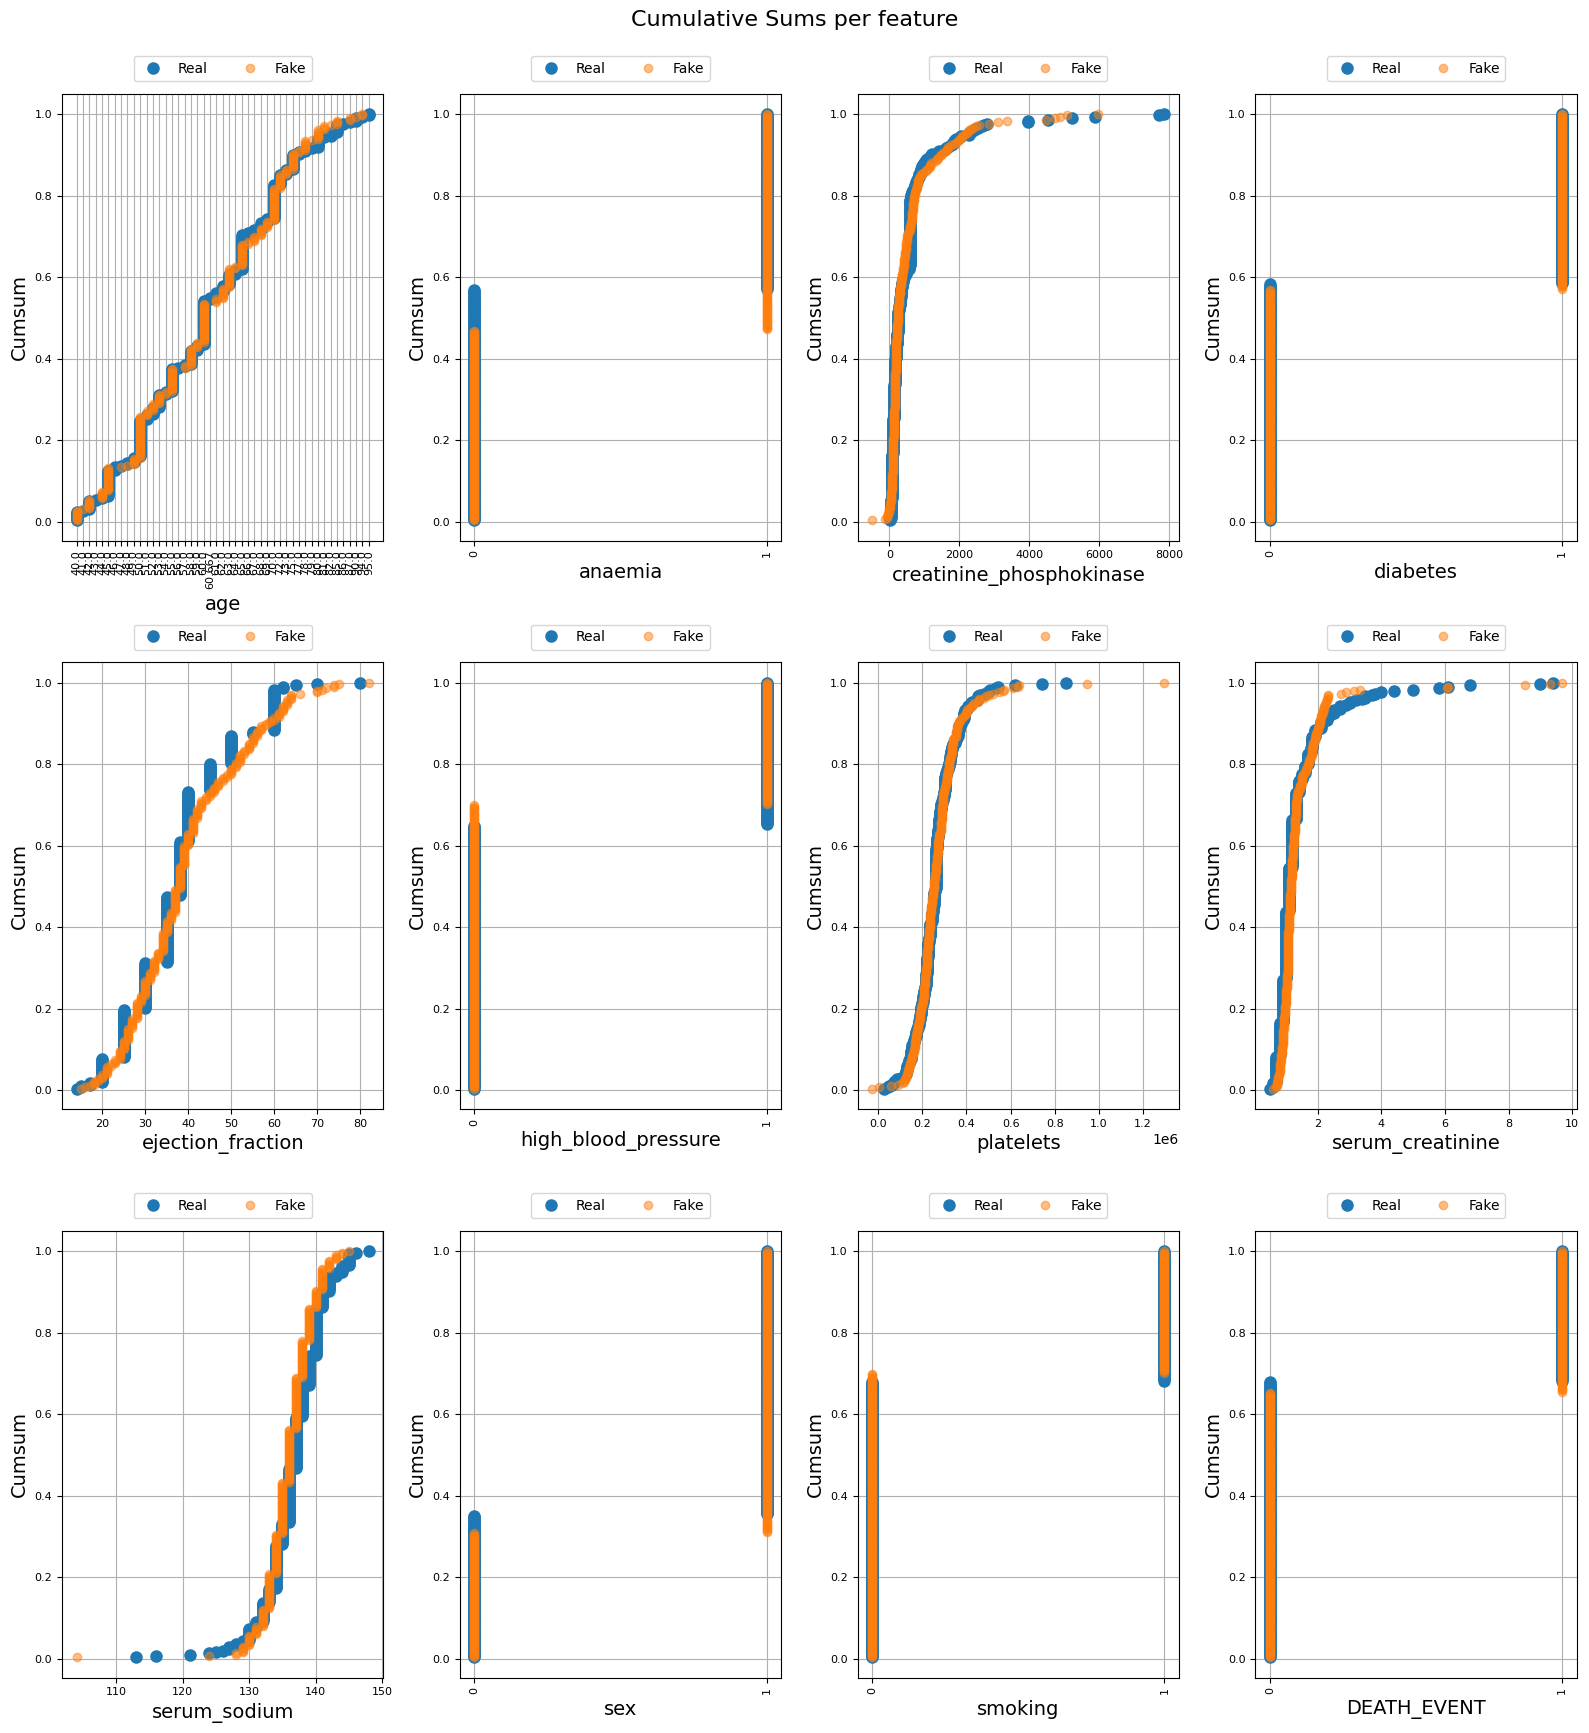

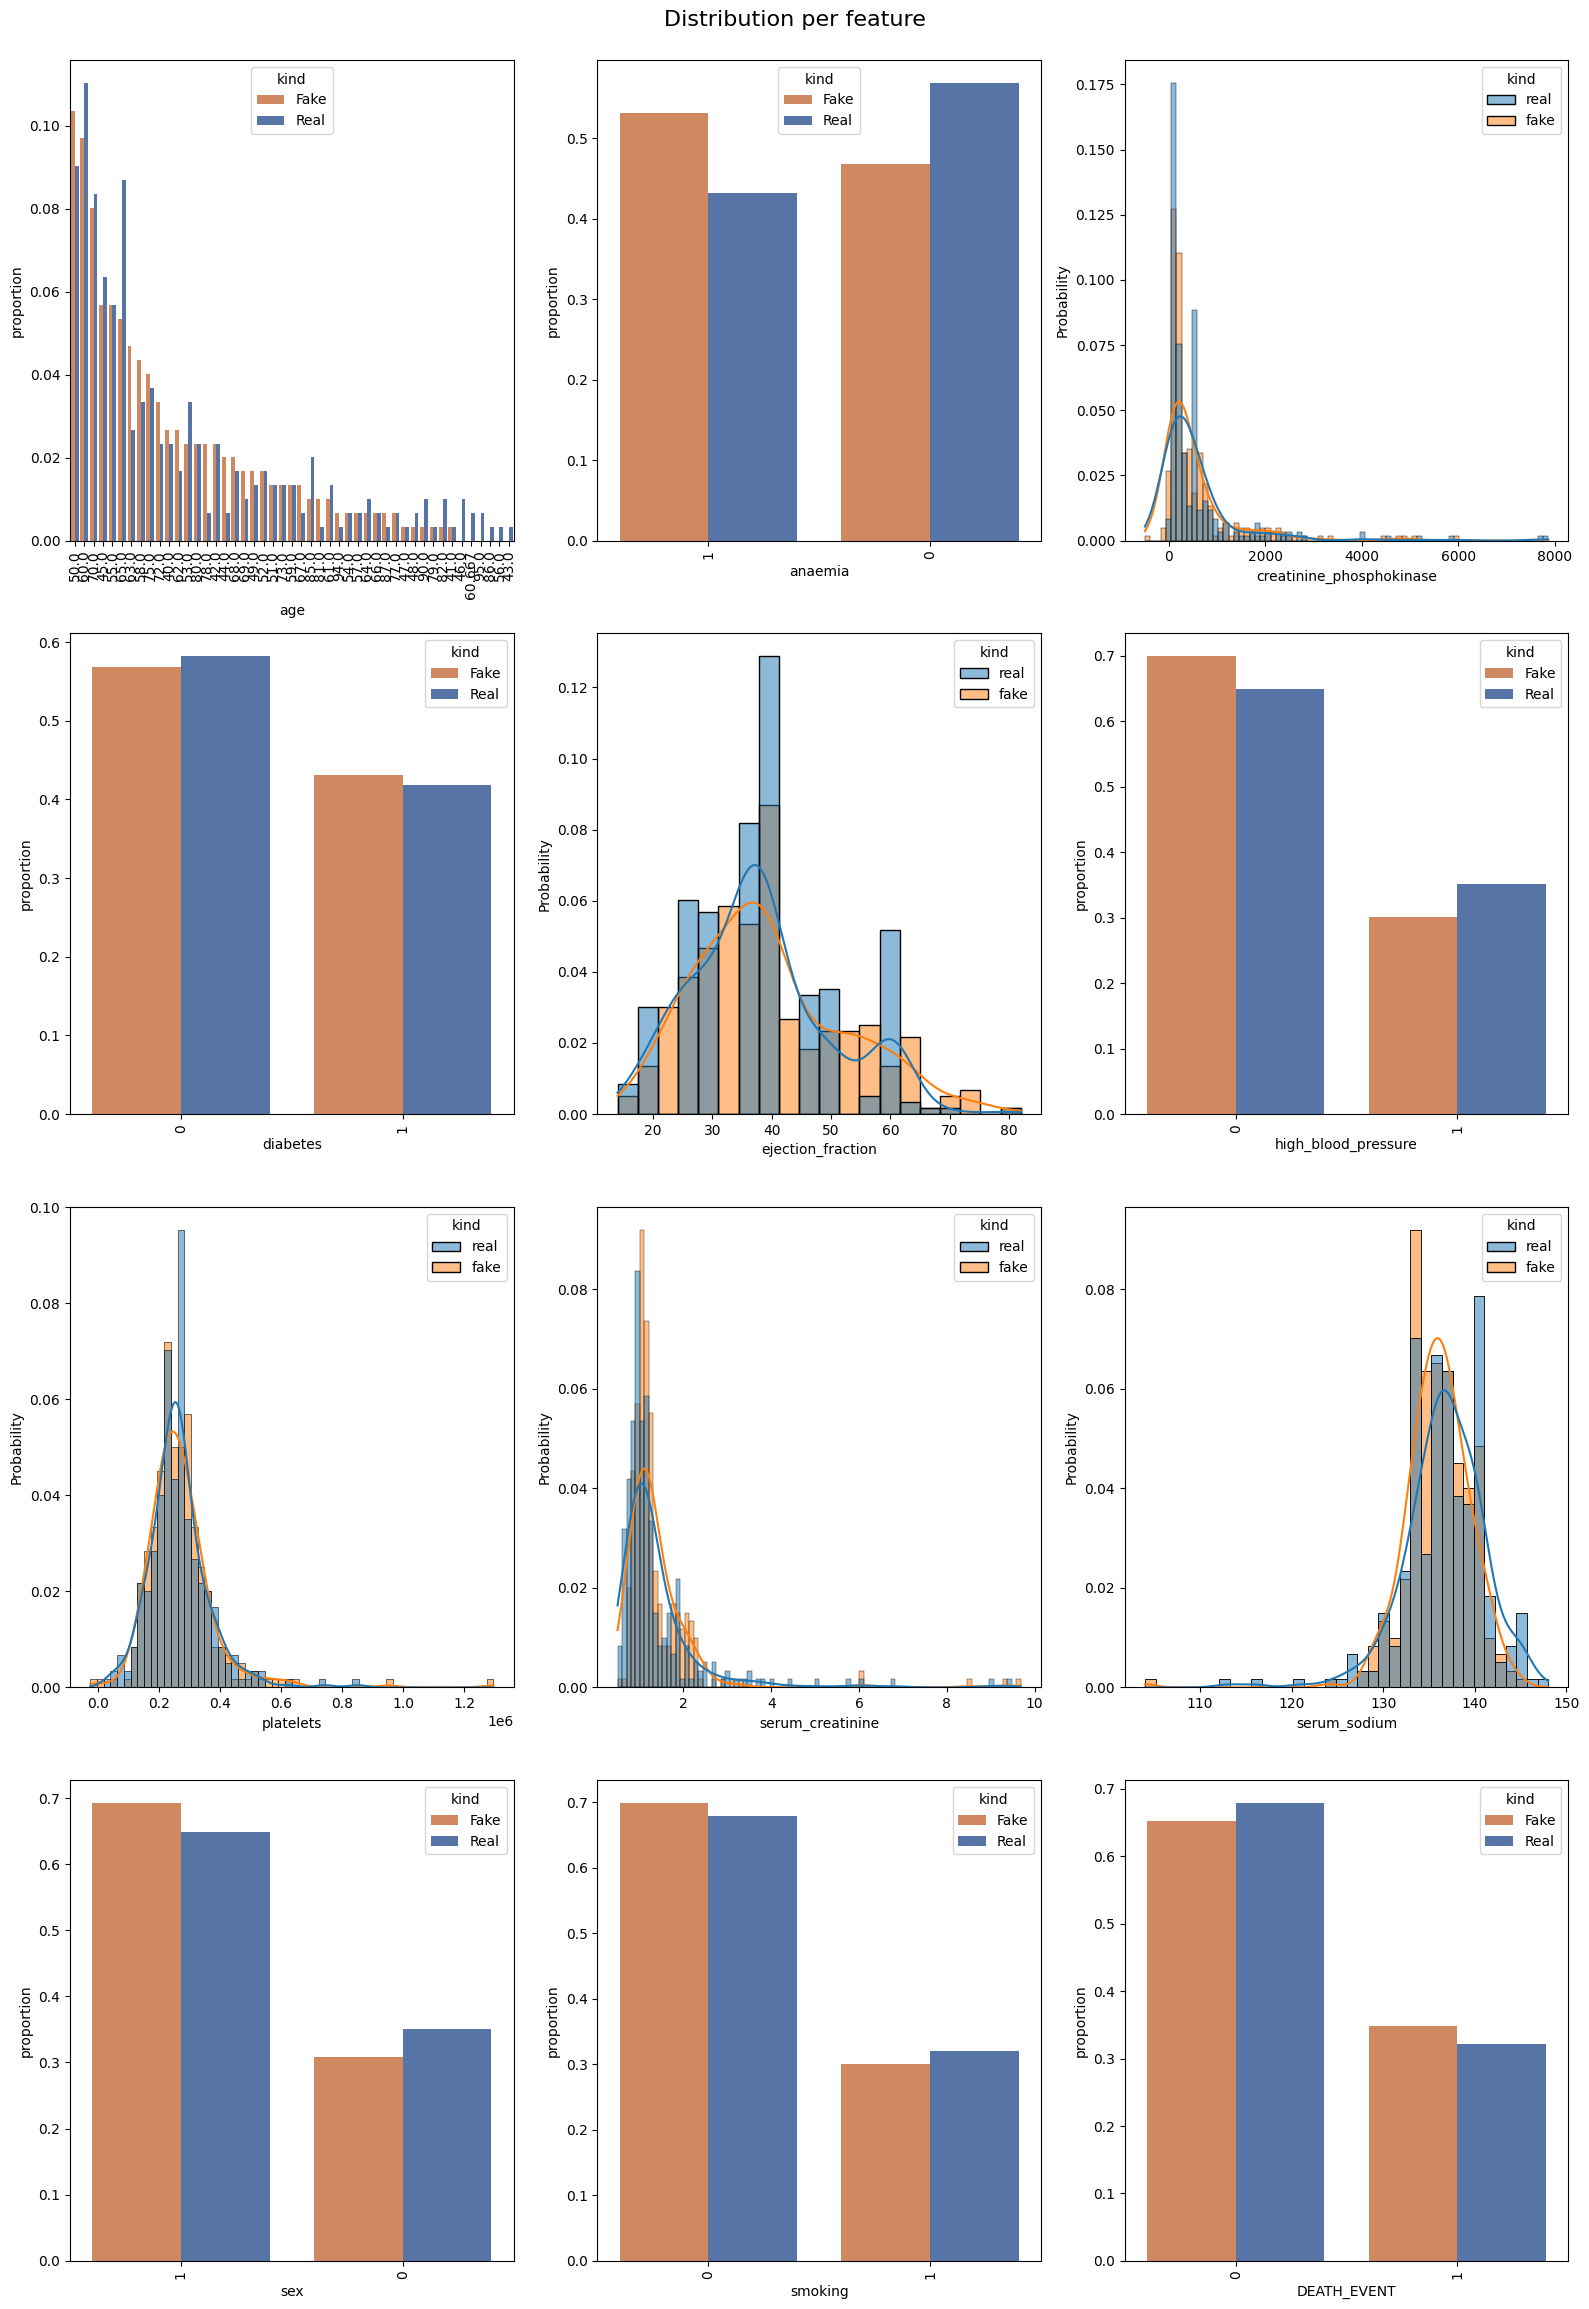

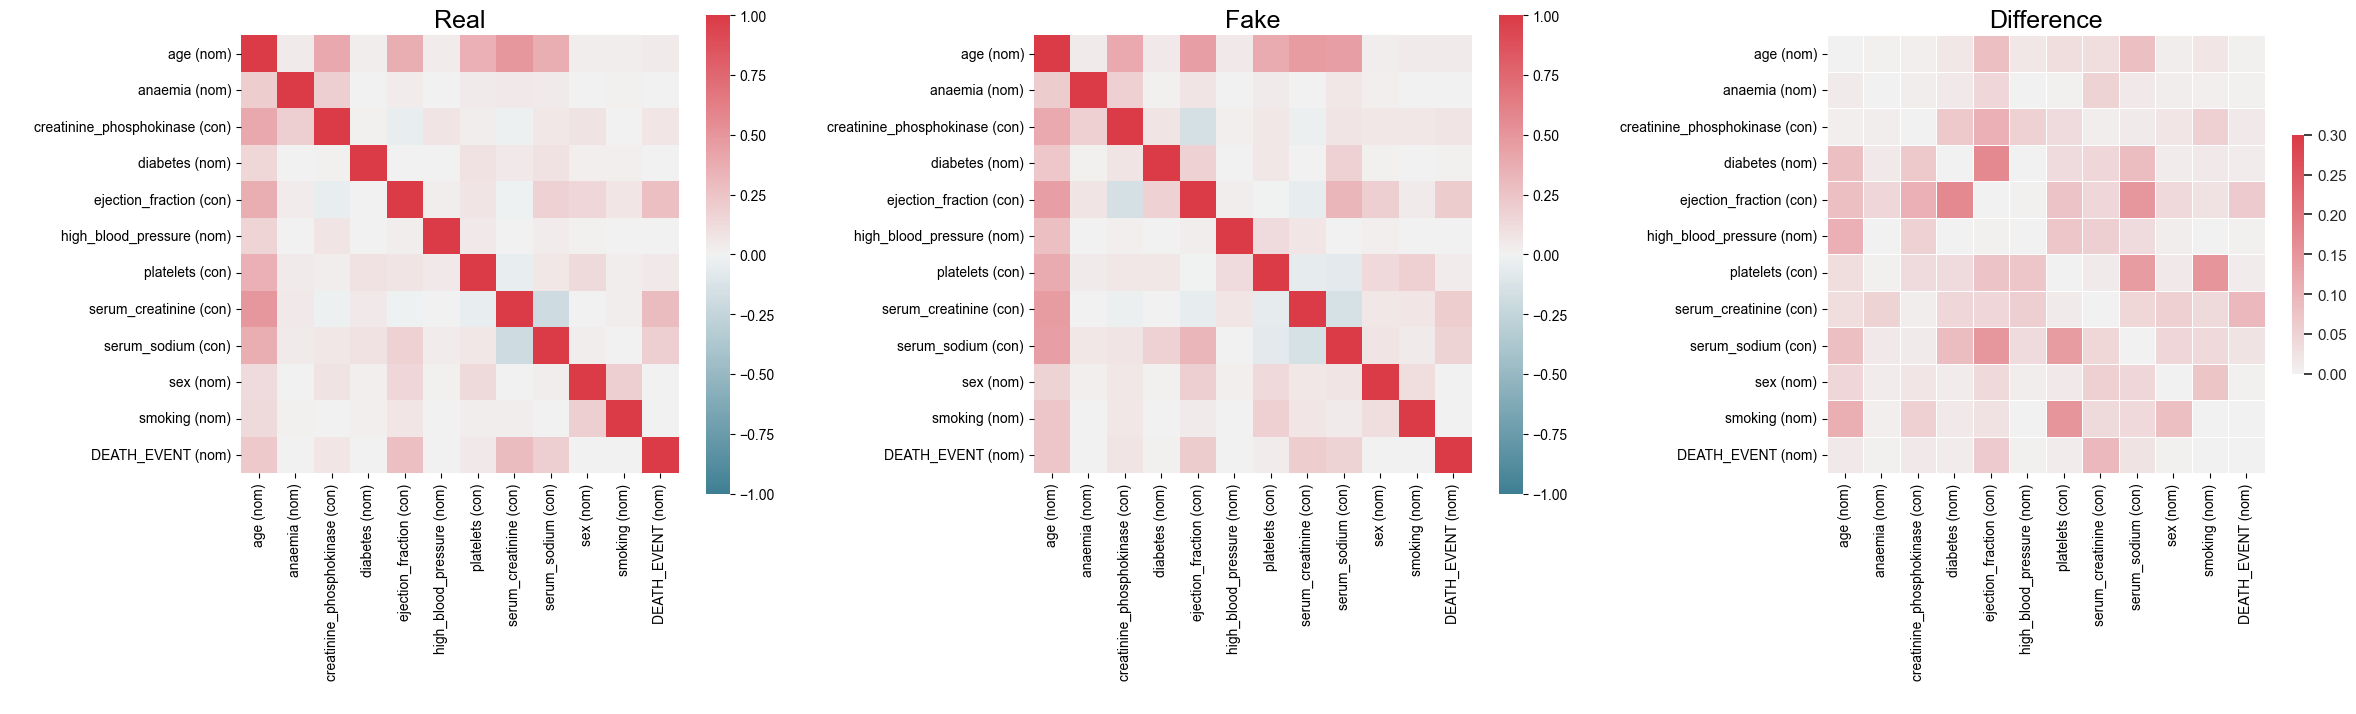

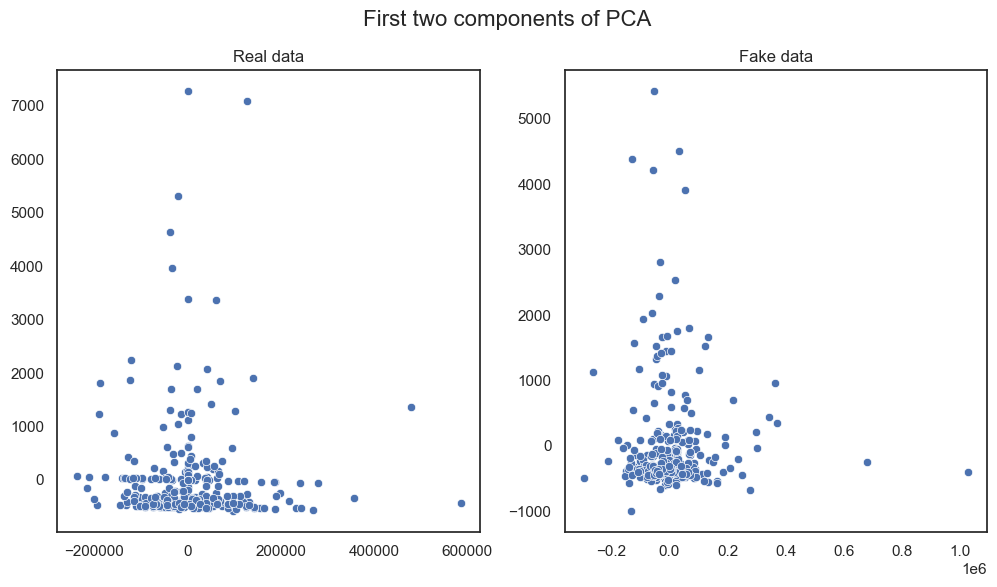

In [10]:
print(data.shape,samples.shape)
table_evaluator= TableEvaluator(data, samples, cat_cols= categorical_features)
table_evaluator.visual_evaluation()

In [11]:
samples.to_csv('sample1lac.csv', index=False)